In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

In [2]:
from sklearn.ensemble import RandomForestClassifier

# Local application imports
from xai_compare.comparison import Consistency 
from xai_compare.datasets import diabetes
from xai_compare.config import MODE

<h3>Consistency measurement demonstration</h3>

In [3]:
# Initialize and train a Random Forest classifier
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

# create the Consistency class with diabetes() dataset
consistency = Consistency(model, *diabetes(), mode=MODE.CLASSIFICATION) 

Processing folds: 100%|██████████| 5/5 [00:14<00:00,  2.88s/it]


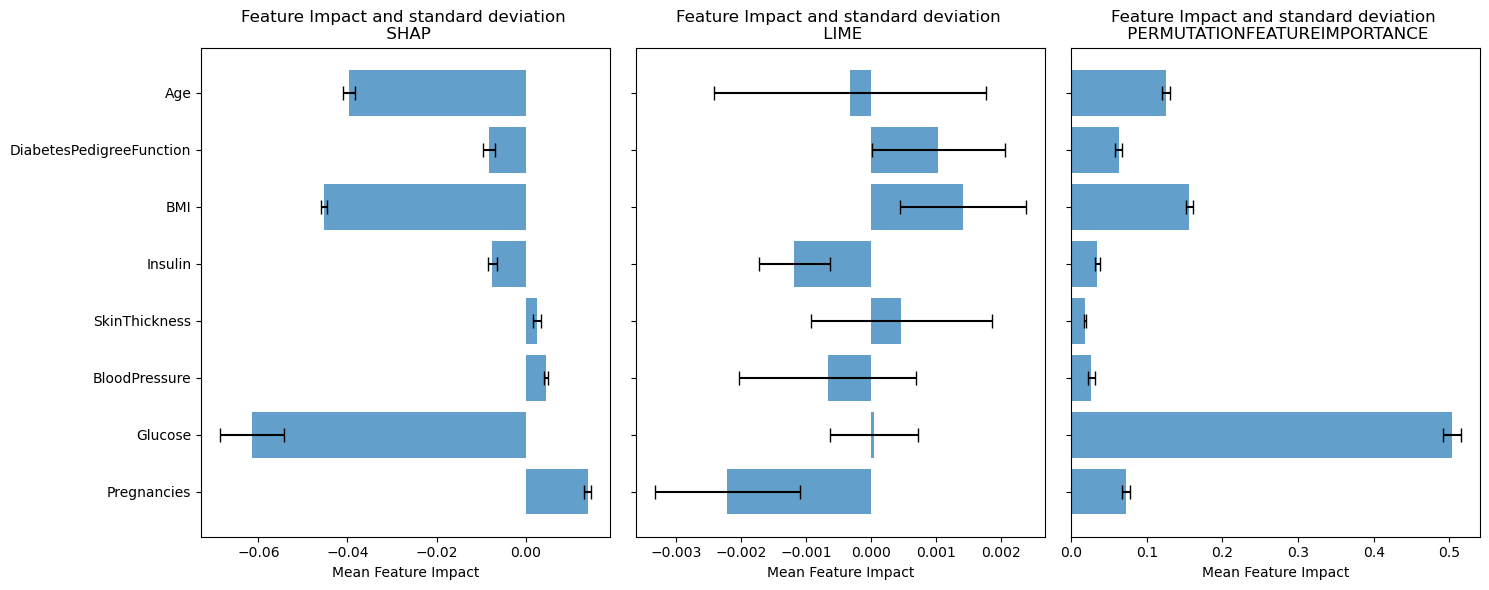

In [4]:
consistency.comparison_report()

In [5]:
consistency.best_result()

,min_std,max_std,mean_std,median_std
SHAP,0.000463,0.007232,0.001719,0.000969
LIME,0.000544,0.002090,0.001146,0.001070
PermutationFeatureImportance,0.001526,0.011327,0.005065,0.004724
